In [14]:
import pandas as pd
from ast import literal_eval
import duckdb
# pd.options.display.max_info_rows=1000
# pd.options.display.max_info_columns=1000

In [5]:
resultados_entrenamiento_gs=pd.read_excel("resultados/resultados_entrenamiento_grid_search.xlsx")
resultados_entrenamiento_gs['sensitivity_per_class']=[literal_eval(i) for i in resultados_entrenamiento_gs['sensitivity_per_class']]
resultados_entrenamiento_gs['specificity_per_class']=[literal_eval(i) for i in resultados_entrenamiento_gs['specificity_per_class']]
resultados_entrenamiento_gs['precision_per_class']=[literal_eval(i) for i in resultados_entrenamiento_gs['precision_per_class']]
resultados_entrenamiento_gs['recall_per_class']=[literal_eval(i) for i in resultados_entrenamiento_gs['recall_per_class']]
resultados_entrenamiento_gs['best_params']=[literal_eval(i) for i in resultados_entrenamiento_gs['best_params']]

resultados_entrenamiento_gs=resultados_entrenamiento_gs[['model', 'encoding', 'accuracy', 'f1_score_weighted',
                                                         'f1_score_macro', 'precision_weighted', 'precision_macro',
                                                         'sensitivity_per_class', 'specificity_per_class', 'precision_per_class',
                                                         'recall_per_class', 'best_params', 'cv_score', 'model_name']]
resultados_entrenamiento_gs.head()

,model,encoding,accuracy,f1_score_weighted,f1_score_macro,precision_weighted,precision_macro,sensitivity_per_class,specificity_per_class,precision_per_class,recall_per_class,best_params,cv_score,model_name
0,SVM,AS-One Hot,0.996183,0.996183,0.995831,0.996300,0.995934,"{'Flavobacterium': 1.0, 'Vibrio': 1.0, 'Coryne...","{'Flavobacterium': 0.9989878542510121, 'Vibrio...","{'Flavobacterium': 0.9836065573770492, 'Vibrio...","{'Flavobacterium': 1.0, 'Vibrio': 1.0, 'Coryne...","{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.993096,SVM
1,Random Forest,AS-One Hot,0.995229,0.995231,0.995218,0.995385,0.995792,"{'Flavobacterium': 1.0, 'Vibrio': 1.0, 'Coryne...","{'Flavobacterium': 1.0, 'Vibrio': 0.9990099009...","{'Flavobacterium': 1.0, 'Vibrio': 0.9743589743...","{'Flavobacterium': 1.0, 'Vibrio': 1.0, 'Coryne...","{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.993327,Random Forest
2,XGBoost,AS-One Hot,0.995229,0.995229,0.994756,0.995345,0.994859,"{'Flavobacterium': 1.0, 'Vibrio': 1.0, 'Coryne...","{'Flavobacterium': 0.9989878542510121, 'Vibrio...","{'Flavobacterium': 0.9836065573770492, 'Vibrio...","{'Flavobacterium': 1.0, 'Vibrio': 1.0, 'Coryne...","{'subsample': 0.8, 'n_estimators': 50, 'max_de...",0.992849,XGBoost
3,SVM,AS-K-mers,0.996183,0.996183,0.995831,0.996300,0.995934,"{'Flavobacterium': 1.0, 'Vibrio': 1.0, 'Coryne...","{'Flavobacterium': 0.9989878542510121, 'Vibrio...","{'Flavobacterium': 0.9836065573770492, 'Vibrio...","{'Flavobacterium': 1.0, 'Vibrio': 1.0, 'Coryne...","{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.993094,SVM
4,Random Forest,AS-K-mers,0.995229,0.995233,0.995122,0.995361,0.995572,"{'Flavobacterium': 1.0, 'Vibrio': 1.0, 'Coryne...","{'Flavobacterium': 1.0, 'Vibrio': 1.0, 'Coryne...","{'Flavobacterium': 1.0, 'Vibrio': 1.0, 'Coryne...","{'Flavobacterium': 1.0, 'Vibrio': 1.0, 'Coryne...","{'max_depth': 30, 'min_samples_split': 5, 'n_e...",0.993561,Random Forest


In [6]:
tiempos_training_optimo=pd.read_excel("resultados/tiempos_entrenamiento_parametros_optimos.xlsx")
tiempos_training_optimo['parametros_optimos']=[literal_eval(i) for i in tiempos_training_optimo['parametros_optimos']]
# tiempos_training_optimo.to_clipboard(sep='^')
tiempos_training_optimo.head()

,encoding,algoritmo,tiempo_segundos,tiempo_minutos,parametros_optimos,accuracy
0,AS-One Hot,SVM,128.021101,2.133685,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.996183
1,AS-One Hot,Random Forest,5.898474,0.098308,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.995229
2,AS-One Hot,XGBoost,150.447602,2.507460,"{'subsample': 0.8, 'n_estimators': 50, 'max_de...",0.995229
3,AS-K-mers,SVM,18.467538,0.307792,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.996183
4,AS-K-mers,Random Forest,3.693542,0.061559,"{'max_depth': 30, 'min_samples_split': 5, 'n_e...",0.995229


In [7]:
tiempos_gs=pd.read_csv("resultados/ml_results.txt")
tiempos_gs.head()

,Encoding,Model,Seconds,Minutes,Accuracy,F1_Weighted,F1_Macro,CV_Score
0,AS-One Hot,SVM,9956.93,165.95,0.9962,0.9962,0.9958,0.9931
1,AS-One Hot,Random Forest,305.68,5.09,0.9952,0.9952,0.9952,0.9933
2,AS-One Hot,XGBoost,5309.65,88.49,0.9952,0.9952,0.9948,0.9928
3,AS-K-mers,SVM,2107.22,35.12,0.9962,0.9962,0.9958,0.9931
4,AS-K-mers,Random Forest,102.62,1.71,0.9952,0.9952,0.9951,0.9936


In [9]:
tiempos_encoding=pd.read_csv("time_per_encoding/resultados_tiempos_memoria/benchmark_results.csv")
tiempos_encoding['all_times']=[literal_eval(i) for i in tiempos_encoding['all_times']]
tiempos_encoding['all_result_sizes']=[literal_eval(i) for i in tiempos_encoding['all_result_sizes']]
tiempos_encoding.head()

,function,avg_time,std_time,avg_result_size,std_result_size,all_times,all_result_sizes,compression_ratio
0,fourier,20.116960,0.136778,1907.349571,0.0,"[20.678351640701294, 20.693629503250122, 20.08...","[1907.3495712280273, 1907.3495712280273, 1907....",1.000400
1,k_mers,35.261657,0.260834,17325.592541,0.0,"[34.142990589141846, 35.1535062789917, 35.1696...","[17325.592540740967, 17325.592540740967, 17325...",9.087231
2,one_hot,48.166257,0.698292,19074.250206,0.0,"[50.27369284629822, 51.79958915710449, 47.8575...","[19074.250205993652, 19074.250205993652, 19074...",10.004397
3,wavelet_transform,21.895146,0.180142,3820.038780,0.0,"[21.55835270881653, 21.55188226699829, 21.5449...","[3820.0387802124023, 3820.0387802124023, 3820....",2.003601
4,kmers_fft,48.247554,0.204595,1906.586632,0.0,"[48.05068874359131, 47.741796016693115, 48.140...","[1906.5866317749023, 1906.5866317749023, 1906....",1.000000


In [ ]:
# resultados_entrenamiento_gs.to_clipboard(sep='^')

In [ ]:
# tiempos_training_optimo.to_clipboard(sep='^')

In [ ]:
# tiempos_gs.to_clipboard(sep='^')

In [ ]:
# tiempos_encoding.to_clipboard(sep='^')

In [29]:
df=resultados_entrenamiento_gs

In [33]:
df=df[['sensitivity_per_class', 'specificity_per_class', 'precision_per_class', 'recall_per_class',]]

Analizando datos de rendimiento por género bacteriano...

=== INFORMACIÓN GENERAL ===
Total de géneros analizados: 30
Total de experimentos por género: 48
Géneros identificados: Acinetobacter, Arthrobacter, Bifidobacterium, Bradyrhizobium, Chryseobacterium, Collinsella, Corynebacterium, Flavobacterium, Mesorhizobium, Methylobacterium, Microbacterium, Micromonospora, Mycobacterium, Nocardia, Nocardioides, Novosphingobium, Paraburkholderia, Paracoccus, Pedobacter, Pelagibacter, Pelagibacter_A, Polynucleobacter, Prevotella, Prochlorococcus_A, Pseudomonas_E, Rhizobium, Sphingomonas, Streptococcus, Streptomyces, Vibrio

=== RESUMEN ESTADÍSTICO POR GÉNERO (Muestra) ===


,Genus,Metric,Mean,Std,Min,Max,Median,Q25,Q75,Count
0,Flavobacterium,sensitivity,0.9979,0.0055,0.9833,1.0,1.0000,1.0000,1.0000,48
1,Flavobacterium,specificity,0.9995,0.0006,0.9980,1.0,1.0000,0.9990,1.0000,48
2,Flavobacterium,precision,0.9918,0.0100,0.9677,1.0,1.0000,0.9836,1.0000,48
3,Flavobacterium,recall,0.9979,0.0055,0.9833,1.0,1.0000,1.0000,1.0000,48
4,Vibrio,sensitivity,0.9912,0.0173,0.9211,1.0,1.0000,0.9934,1.0000,48
5,Vibrio,specificity,0.9975,0.0024,0.9921,1.0,0.9990,0.9950,0.9990,48
6,Vibrio,precision,0.9391,0.0548,0.8222,1.0,0.9744,0.8830,0.9744,48
7,Vibrio,recall,0.9912,0.0173,0.9211,1.0,1.0000,0.9934,1.0000,48
8,Corynebacterium,sensitivity,0.9811,0.0305,0.9091,1.0,1.0000,0.9716,1.0000,48
9,Corynebacterium,specificity,0.9977,0.0043,0.9841,1.0,1.0000,0.9980,1.0000,48



=== COEFICIENTE DE VARIACIÓN POR GÉNERO ===


,Genus,sensitivity_CV,specificity_CV,precision_CV,recall_CV
0,Flavobacterium,0.0055,0.0006,0.0101,0.0055
1,Vibrio,0.0174,0.0024,0.0584,0.0174
2,Corynebacterium,0.0311,0.0043,0.0825,0.0311
3,Pseudomonas_E,0.0063,0.0006,0.0099,0.0063
4,Pelagibacter,0.0000,0.0001,0.0030,0.0000
5,Bradyrhizobium,0.0000,0.0003,0.0077,0.0000
6,Mycobacterium,0.0103,0.0013,0.0265,0.0103
7,Nocardioides,0.0000,0.0010,0.0238,0.0000
8,Streptomyces,0.0091,0.0005,0.0113,0.0091
9,Prevotella,0.0323,0.0013,0.0731,0.0323



=== ANÁLISIS DE RENDIMIENTO ===

SENSITIVITY:
  Top 3 géneros:
    Pelagibacter: 1.0000
    Bradyrhizobium: 1.0000
    Nocardioides: 1.0000
  Bottom 3 géneros:
    Collinsella: 0.9651
    Mesorhizobium: 0.9577
    Pedobacter: 0.9187

SPECIFICITY:
  Top 3 géneros:
    Pelagibacter_A: 1.0000
    Nocardia: 1.0000
    Rhizobium: 1.0000
  Bottom 3 géneros:
    Acinetobacter: 0.9988
    Corynebacterium: 0.9977
    Vibrio: 0.9975

PRECISION:
  Top 3 géneros:
    Pelagibacter: 0.9996
    Chryseobacterium: 0.9995
    Rhizobium: 0.9994
  Bottom 3 géneros:
    Prevotella: 0.9585
    Corynebacterium: 0.9551
    Vibrio: 0.9391

RECALL:
  Top 3 géneros:
    Pelagibacter: 1.0000
    Bradyrhizobium: 1.0000
    Nocardioides: 1.0000
  Bottom 3 géneros:
    Collinsella: 0.9651
    Mesorhizobium: 0.9577
    Pedobacter: 0.9187

=== ESTADÍSTICAS GENERALES POR MÉTRICA ===
Sensitivity:
  Media global: 0.9854
  Desviación estándar: 0.0172
  Rango: 0.9187 - 1.0000
Specificity:
  Media global: 0.9996
  Desviaci

C:\Users\123di\AppData\Local\Temp\ipykernel_38176\1898359697.py:102: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(data_for_plot, labels=labels, patch_artist=True)
C:\Users\123di\AppData\Local\Temp\ipykernel_38176\1898359697.py:102: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(data_for_plot, labels=labels, patch_artist=True)
C:\Users\123di\AppData\Local\Temp\ipykernel_38176\1898359697.py:102: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(data_for_plot, labels=labels, patch_artist=True)
C:\Users\123di\AppData\Local\Temp\ipykernel_38176\1898359697.py:102: M

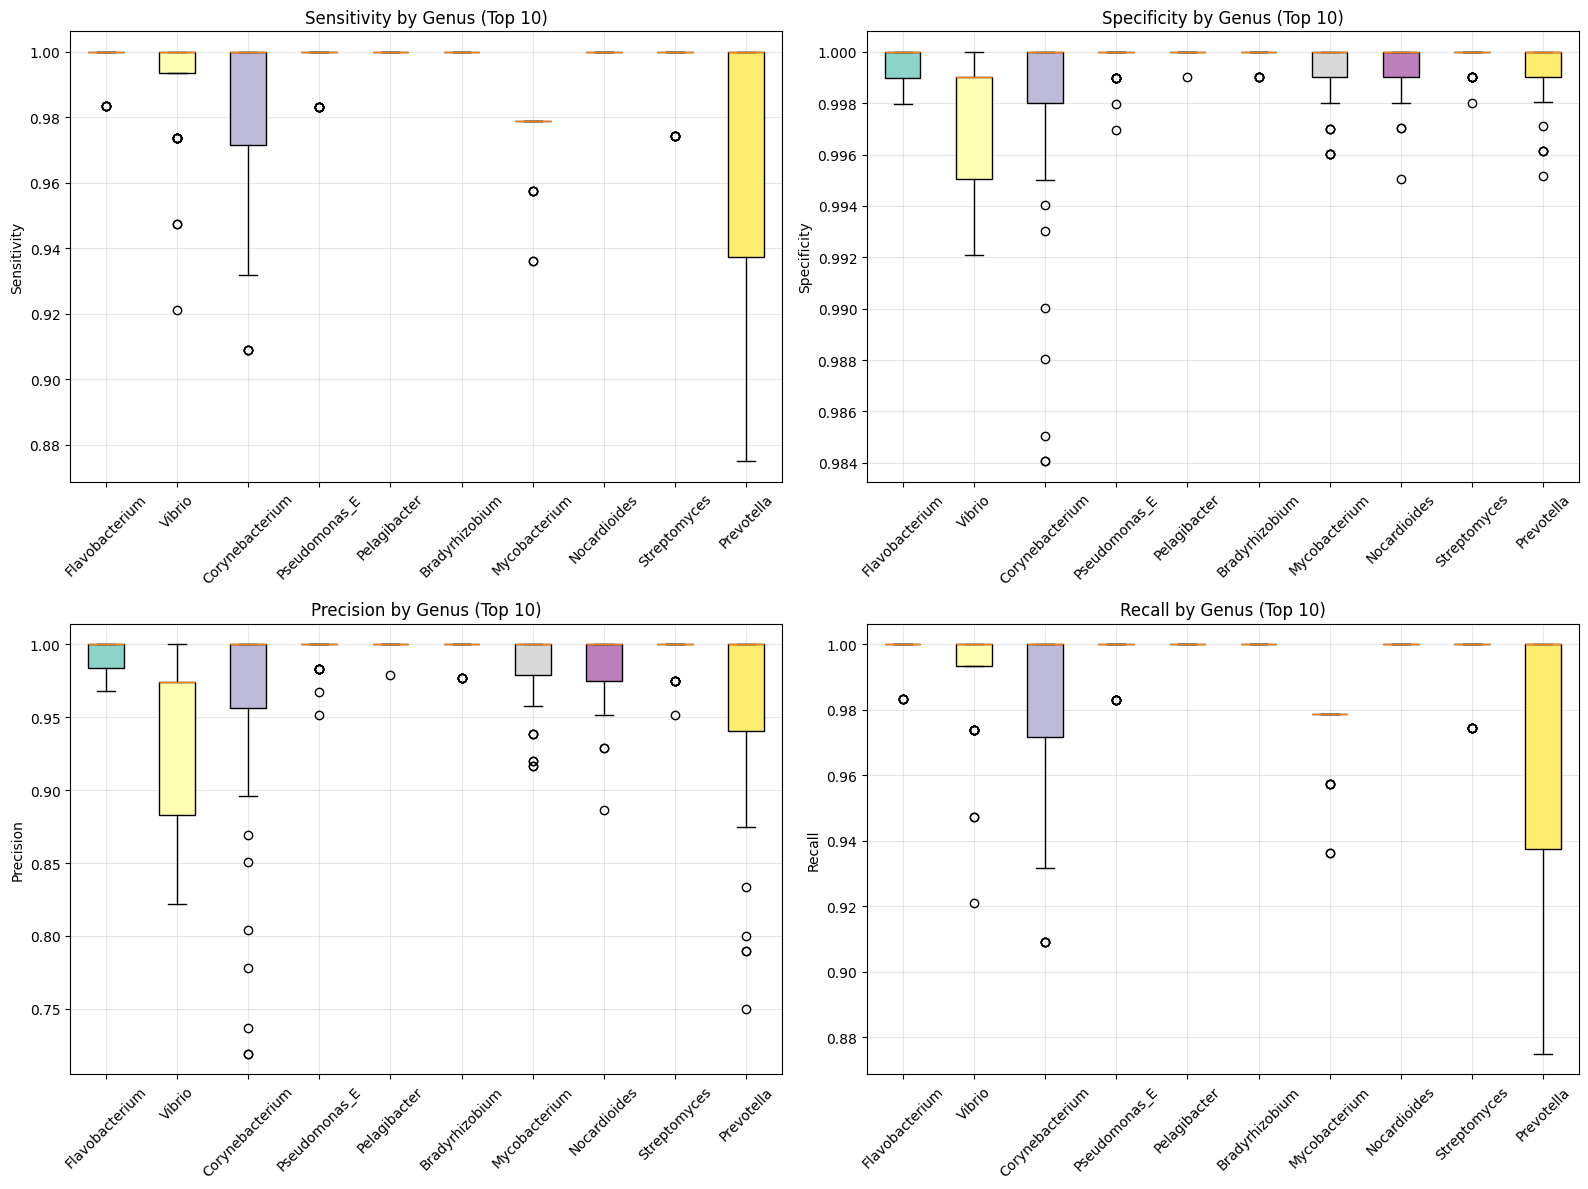

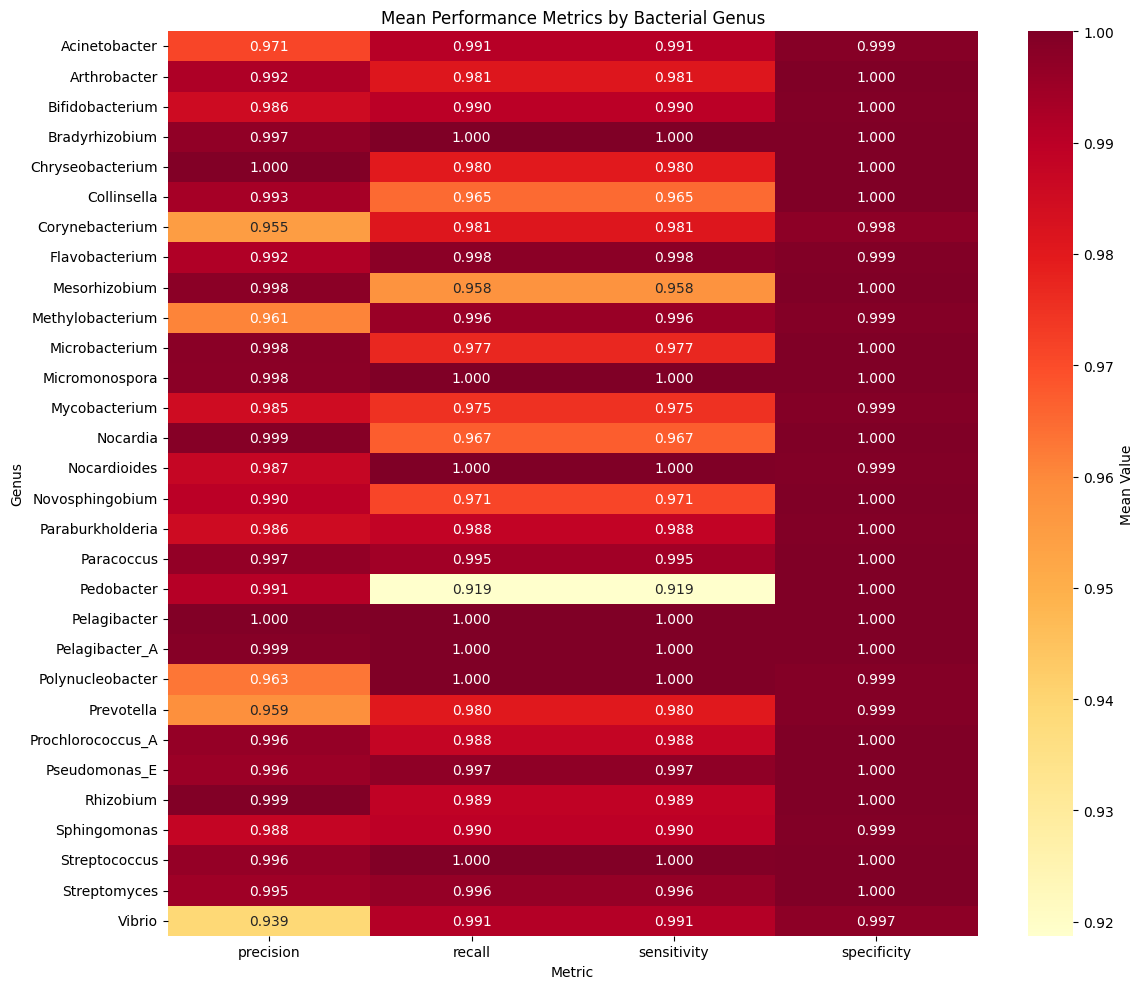


=== DATOS DISPONIBLES PARA ANÁLISIS POSTERIOR ===
Variables creadas:
- metrics_by_genus: diccionario con métricas por género
- stats_summary: estadísticas completas por género
- summary_df: dataframe resumen
- variability_df: análisis de variabilidad


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def extract_metrics_by_genus(df):
    """
    Extrae las métricas por género bacteriano desde el dataframe
    """
    # Diccionarios para almacenar los valores por género
    metrics_by_genus = defaultdict(lambda: defaultdict(list))
    
    # Columnas de métricas
    metric_columns = ['sensitivity_per_class', 'specificity_per_class', 
                     'precision_per_class', 'recall_per_class']
    
    for idx, row in df.iterrows():
        for metric_col in metric_columns:
            # Los datos ya son diccionarios, no necesitan conversión
            metric_dict = row[metric_col]
            
            # Extraer valores por género
            for genus, value in metric_dict.items():
                metrics_by_genus[genus][metric_col].append(value)
    
    return metrics_by_genus

def calculate_statistics(metrics_by_genus):
    """
    Calcula estadísticas descriptivas para cada género y métrica
    """
    stats_summary = {}
    
    for genus in metrics_by_genus.keys():
        stats_summary[genus] = {}
        
        for metric in ['sensitivity_per_class', 'specificity_per_class', 
                      'precision_per_class', 'recall_per_class']:
            values = np.array(metrics_by_genus[genus][metric])
            
            stats_summary[genus][metric] = {
                'mean': np.mean(values),
                'std': np.std(values),
                'min': np.min(values),
                'max': np.max(values),
                'median': np.median(values),
                'q25': np.percentile(values, 25),
                'q75': np.percentile(values, 75),
                'count': len(values)
            }
    
    return stats_summary

def create_summary_dataframe(stats_summary):
    """
    Crea un dataframe resumen con todas las estadísticas
    """
    summary_data = []
    
    for genus in stats_summary.keys():
        for metric in stats_summary[genus].keys():
            row = {
                'Genus': genus,
                'Metric': metric.replace('_per_class', ''),
                'Mean': stats_summary[genus][metric]['mean'],
                'Std': stats_summary[genus][metric]['std'],
                'Min': stats_summary[genus][metric]['min'],
                'Max': stats_summary[genus][metric]['max'],
                'Median': stats_summary[genus][metric]['median'],
                'Q25': stats_summary[genus][metric]['q25'],
                'Q75': stats_summary[genus][metric]['q75'],
                'Count': stats_summary[genus][metric]['count']
            }
            summary_data.append(row)
    
    return pd.DataFrame(summary_data)

def plot_metrics_comparison(metrics_by_genus):
    """
    Crea gráficos de comparación entre géneros
    """
    # Seleccionar solo algunos géneros para mejor visualización
    genera_to_plot = list(metrics_by_genus.keys())[:10]  # Primeros 10 géneros
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    metrics = ['sensitivity_per_class', 'specificity_per_class', 
               'precision_per_class', 'recall_per_class']
    metric_names = ['Sensitivity', 'Specificity', 'Precision', 'Recall']
    
    for i, (metric, name) in enumerate(zip(metrics, metric_names)):
        data_for_plot = []
        labels = []
        
        for genus in genera_to_plot:
            if genus in metrics_by_genus:
                data_for_plot.append(metrics_by_genus[genus][metric])
                labels.append(genus)
        
        bp = axes[i].boxplot(data_for_plot, labels=labels, patch_artist=True)
        axes[i].set_title(f'{name} by Genus (Top 10)')
        axes[i].set_ylabel(name)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)
        
        # Colorear las cajas
        colors = plt.cm.Set3(np.linspace(0, 1, len(bp['boxes'])))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
    
    plt.tight_layout()
    plt.show()

def plot_heatmap_means(summary_df):
    """
    Crea un heatmap con los valores promedio por género y métrica
    """
    # Pivot para crear matriz de géneros vs métricas
    heatmap_data = summary_df.pivot(index='Genus', columns='Metric', values='Mean')
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', 
                fmt='.3f', cbar_kws={'label': 'Mean Value'})
    plt.title('Mean Performance Metrics by Bacterial Genus')
    plt.tight_layout()
    plt.show()

def analyze_performance_variability(metrics_by_genus):
    """
    Analiza la variabilidad del rendimiento por género
    """
    variability_data = []
    
    for genus in metrics_by_genus.keys():
        genus_variability = {}
        genus_variability['Genus'] = genus
        
        for metric in ['sensitivity_per_class', 'specificity_per_class', 
                      'precision_per_class', 'recall_per_class']:
            values = np.array(metrics_by_genus[genus][metric])
            cv = np.std(values) / np.mean(values) if np.mean(values) > 0 else 0
            genus_variability[f'{metric.replace("_per_class", "")}_CV'] = cv
        
        variability_data.append(genus_variability)
    
    return pd.DataFrame(variability_data)

def get_top_bottom_performers(summary_df, n=5):
    """
    Identifica los mejores y peores géneros para cada métrica
    """
    results = {}
    
    for metric in ['sensitivity', 'specificity', 'precision', 'recall']:
        metric_data = summary_df[summary_df['Metric'] == metric].copy()
        metric_data = metric_data.sort_values('Mean', ascending=False)
        
        results[metric] = {
            'top': metric_data.head(n)[['Genus', 'Mean']].values.tolist(),
            'bottom': metric_data.tail(n)[['Genus', 'Mean']].values.tolist()
        }
    
    return results
# Ejecutar el análisis completo
print("Analizando datos de rendimiento por género bacteriano...")

# Extraer métricas por género
metrics_by_genus = extract_metrics_by_genus(df)

# Calcular estadísticas
stats_summary = calculate_statistics(metrics_by_genus)

# Crear dataframe resumen
summary_df = create_summary_dataframe(stats_summary)

# Mostrar información básica
print(f"\n=== INFORMACIÓN GENERAL ===")
print(f"Total de géneros analizados: {len(metrics_by_genus)}")
print(f"Total de experimentos por género: {len(df)}")
print(f"Géneros identificados: {', '.join(sorted(metrics_by_genus.keys()))}")

# Mostrar resumen estadístico (solo primeros registros para no saturar)
print("\n=== RESUMEN ESTADÍSTICO POR GÉNERO (Muestra) ===")
display(summary_df.head(20).round(4))

# Análisis de variabilidad
variability_df = analyze_performance_variability(metrics_by_genus)
print("\n=== COEFICIENTE DE VARIACIÓN POR GÉNERO ===")
display(variability_df.round(4))

# Identificar mejores y peores rendimientos
print("\n=== ANÁLISIS DE RENDIMIENTO ===")
top_bottom = get_top_bottom_performers(summary_df, n=3)

for metric in ['sensitivity', 'specificity', 'precision', 'recall']:
    print(f"\n{metric.upper()}:")
    print("  Top 3 géneros:")
    for genus, score in top_bottom[metric]['top']:
        print(f"    {genus}: {score:.4f}")
    print("  Bottom 3 géneros:")
    for genus, score in top_bottom[metric]['bottom']:
        print(f"    {genus}: {score:.4f}")

# Análisis por métrica
print("\n=== ESTADÍSTICAS GENERALES POR MÉTRICA ===")
for metric in ['sensitivity', 'specificity', 'precision', 'recall']:
    metric_data = summary_df[summary_df['Metric'] == metric]['Mean']
    print(f"{metric.capitalize()}:")
    print(f"  Media global: {metric_data.mean():.4f}")
    print(f"  Desviación estándar: {metric_data.std():.4f}")
    print(f"  Rango: {metric_data.min():.4f} - {metric_data.max():.4f}")

# Generar gráficos
plot_metrics_comparison(metrics_by_genus)
plot_heatmap_means(summary_df)

# Guardar resultados en variables para análisis posterior
print("\n=== DATOS DISPONIBLES PARA ANÁLISIS POSTERIOR ===")
print("Variables creadas:")
print("- metrics_by_genus: diccionario con métricas por género")
print("- stats_summary: estadísticas completas por género")
print("- summary_df: dataframe resumen")
print("- variability_df: análisis de variabilidad")

In [39]:
summary_df

,Genus,Metric,Mean,Std,Min,Max,Median,Q25,Q75,Count
0,Flavobacterium,sensitivity,0.997917,0.005512,0.983333,1.0,1.0,1.000000,1.0,48
1,Flavobacterium,specificity,0.999494,0.000620,0.997976,1.0,1.0,0.998988,1.0,48
2,Flavobacterium,precision,0.991825,0.009968,0.967742,1.0,1.0,0.983607,1.0,48
3,Flavobacterium,recall,0.997917,0.005512,0.983333,1.0,1.0,1.000000,1.0,48
4,Vibrio,sensitivity,0.991228,0.017268,0.921053,1.0,1.0,0.993421,1.0,48
...,...,...,...,...,...,...,...,...,...,...
115,Paraburkholderia,recall,0.988333,0.018181,0.960000,1.0,1.0,0.960000,1.0,48
116,Sphingomonas,sensitivity,0.989583,0.016770,0.952381,1.0,1.0,0.976190,1.0,48
117,Sphingomonas,specificity,0.999482,0.000907,0.996024,1.0,1.0,0.999006,1.0,48
118,Sphingomonas,precision,0.987809,0.020972,0.911111,1.0,1.0,0.976190,1.0,48
